In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from the provided link
url = "https://data.nasa.gov/resource/y77d-th95.json"
data = pd.read_json(url)
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [3]:
# Convert the 'date' column to datetime format
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [4]:
data['year'] = data['year'].dt.strftime('%Y')

In [5]:
# Convert 'year' column to numeric data type
data['year'] = pd.to_numeric(data['year'], errors='coerce')

In [6]:
data.shape

(1000, 12)

### Get all the Earth meteorites that fell before the year 2000

In [7]:
# Get all Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = data[(data['reclat'].notnull()) & (data['year'] < 2000)]

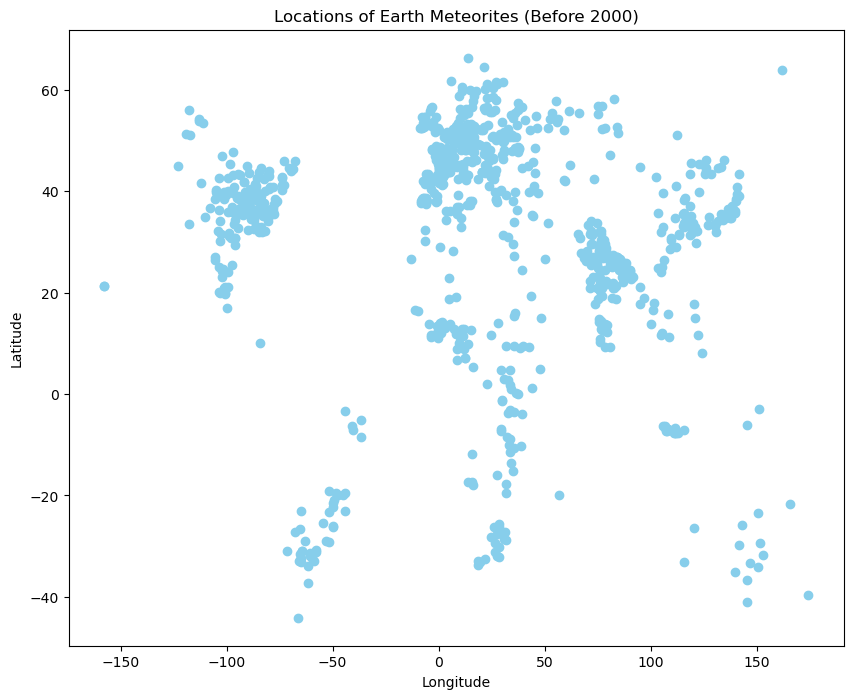

In [8]:
# Plot the locations of Earth meteorites that fell before the year 2000
plt.figure(figsize=(10, 8))
plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'], color='skyblue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Earth Meteorites (Before 2000)')
plt.show()

### Get all the earth meteorites co-ordinates who fell before the year 1970

In [9]:
# Get all Earth meteorites coordinates that fell before the year 1970
earth_meteorites_before_1970 = data[(data['reclat'].notnull()) & (data['year'] < 1970)]

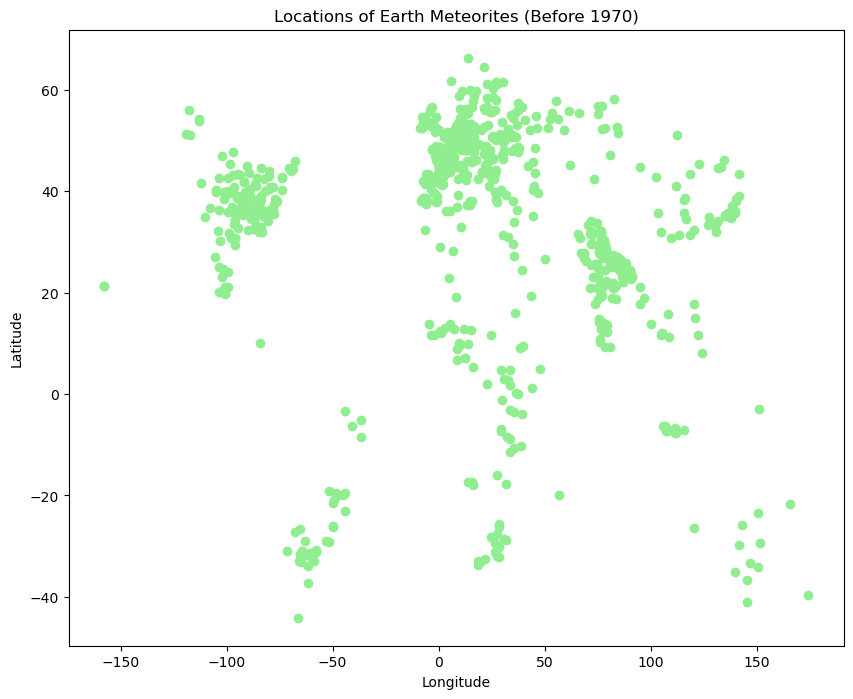

In [10]:
# Plot the locations of Earth meteorites that fell before the year 1970
plt.figure(figsize=(10, 8))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], color='lightgreen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Earth Meteorites (Before 1970)')
plt.show()

### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [11]:
# Get all Earth meteorites with a mass greater than 10000 kg (assuming mass is in kg)
earth_meteorites_greater_than_10000kg = data[data['mass'] > 10000]

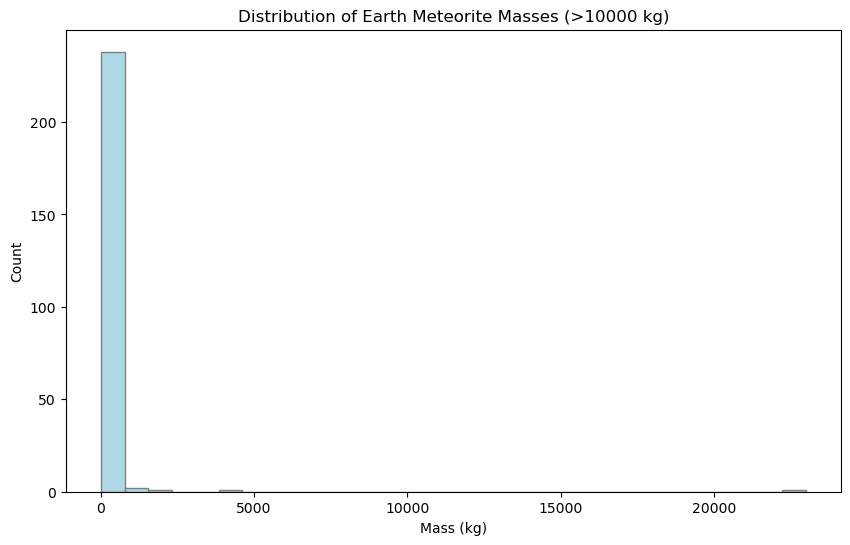

In [12]:
# Plot the distribution of Earth meteorite masses greater than 10000 kg
plt.figure(figsize=(10, 6))
plt.hist(earth_meteorites_greater_than_10000kg['mass'] / 1000, bins=30, color='lightblue', edgecolor='gray')
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.title('Distribution of Earth Meteorite Masses (>10000 kg)')
plt.show()